In [1]:
cd /content/drive/MyDrive/Colab Notebooks/NLP/Sentiment_Analysis

/content/drive/MyDrive/Colab Notebooks/NLP/Sentiment_Analysis


In [2]:
%ls

'Bản sao của Machine Learning.ipynb'   PhoBERT_base_transformers/
 best1.pth                             Preprocess.ipynb
 best2.pth                             runs/
 best3.pth                             SVM.pkl
 best4.pth                             tfidf_LinearSVM.pkl
 best5.pth                             tfidf_NaiveBayes.pkl
 data/                                 tfidf_SVM.pkl
 data_processing/                      tfidf_vectorizer_tiki.pkl
'Deep Learning.ipynb'                  vectorizer_tiki.pkl
 LinearSVM.pkl                         ver2/
'Machine Learning.ipynb'               vncorenlp/
 NaiveBayes.pkl


# Import Libraries

In [3]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
import pickle
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score,r2_score
import seaborn as sns
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from joblib import dump, load
from wordcloud import WordCloud

In [4]:
df=pd.read_csv("data/data_done2.csv",  encoding='utf8').iloc[:,1:]
print(df.head())
train_text = list(df.loc[:,'sentiment'])
train_labels = list(df.loc[:,'label'])
print(train_text[:10])
print(train_labels[:10])

   label                                          sentiment
0      0                chất_son không hài_lòng làm môi khô
1      0  treo đầu dê bán thịt chó à kêu hàng thái_lan m...
2      1                         màu không đúng với thưc tế
3      2                      sản_phẩm giống mô_tả giao rất
4      2  hàng rất đẹp siêu dễ_thương luôn phần sau hơi ...
['chất_son không hài_lòng làm môi khô', 'treo đầu dê bán thịt chó à kêu hàng thái_lan mà nhận về lại là hàng indonexia là', 'màu không đúng với thưc tế', 'sản_phẩm giống mô_tả giao rất', 'hàng rất đẹp siêu dễ_thương luôn phần sau hơi dơ một_tí mong cửa_hàng lần sau cẩn thẩn hơn nhưng_mà không sao hàng đẹp là oketiki giao hàng cũng nhanh', 'đơn hàng của mình bị mở ra từ trước mình rất thất_vọng về dịch_vụ giao hàng lần này mình thật_sự rất khó_chịu khi ai đó xem đồ của mình', 'khăn bên trong bị mốc cửa_hàng bán khăn chất_lượng quá kém khăn như_vậy dùng không được vui_lòng hướng_dẫn hoàn hàng', 'ngon trong tầm giá tốc_độ thì đọc ghi đ

# Phân bố dữ liệu

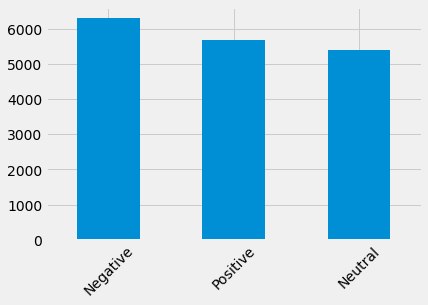

In [18]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax =df['label'].value_counts().plot(kind='bar')
ax.set_xticklabels( ['Negative','Positive','Neutral'], rotation=45 ) ;
plt.show()

# WordCloud

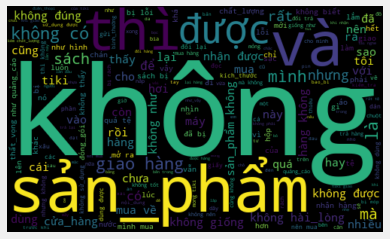

In [8]:
plt.style.use('fivethirtyeight')
allWords=' '.join([text for text in df[df['label']==0]['sentiment']])
wordcloud=WordCloud(width=500,height=300,random_state=21,max_font_size=300).generate(allWords)
plt.imshow(wordcloud,interpolation="bilinear")
plt.axis("off")
plt.show()

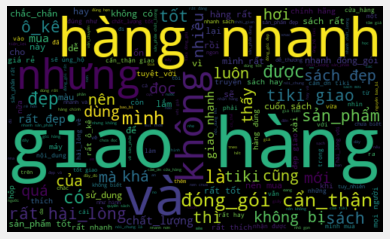

In [9]:
plt.style.use('fivethirtyeight')
allWords=' '.join([text for text in df[df['label']==2]['sentiment']])
wordcloud=WordCloud(width=500,height=300,random_state=21,max_font_size=300).generate(allWords)
plt.imshow(wordcloud,interpolation="bilinear")
plt.axis("off")
plt.show()

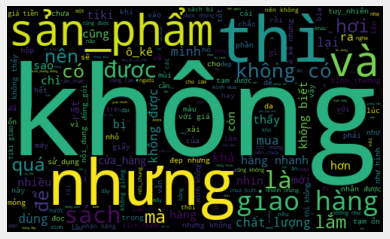

In [10]:
plt.style.use('fivethirtyeight')
allWords=' '.join([text for text in df[df['label']==1]['sentiment']])
wordcloud=WordCloud(width=500,height=300,random_state=21,max_font_size=300).generate(allWords)
plt.imshow(wordcloud,interpolation="bilinear")
plt.axis("off")
plt.show()

# Utils

In [23]:
def show_classification_report(y_predict, target_names):
  Classification_report = classification_report(y_test,y_predict, target_names=target_names)
  print(Classification_report)

In [24]:
def show_confusion_matrix(cm, algorithm):
  group_names = ["True Negative","False Neutral","False Positive","False Negative","True Neutral","False Positive","False Negative","False Neutral","True Positive"]

  group_counts = ["{0:0.0f}".format(value) for value in
                  cm.flatten()]
  group_percentages = ["{0:.2%}".format(value) for value in
                      cm.flatten()/np.sum(cm)]
  labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
            zip(group_names,group_counts,group_percentages)]
  labels = np.asarray(labels).reshape(3,3)
  ax= plt.subplot()
  ax.set_title(algorithm+' Confusion Matrix  ');
  sns.heatmap(cm, annot=labels,ax=ax, fmt='', cmap='Blues')

  ax.xaxis.set_ticklabels(['Negative','Neutral', 'Positive']); ax.yaxis.set_ticklabels(['Negative','Neutral', 'Positive']);

  plt.xlabel('Predicted')
  plt.ylabel('Data')

In [25]:
def show_accuracy(classifier):
  accuracy=classifier.score(X_test,y_test)
  print('Accuracy',int(round(accuracy*100)),'%')
  print('Coefficient of determination: %.2f'% r2_score(y_test,y_predict))

In [26]:
target_names=['Negative','Neutral' ,'Positive']

# Count Vectorizer

In [ ]:
vectorizer=CountVectorizer()
X=vectorizer.fit_transform(train_text)

In [ ]:
pickle.dump(vectorizer, open('vectorizer_tiki.pkl','wb'))
# vectorizer = pickle.load(open('vectorizer_tiki.pkl', 'rb'))

In [ ]:
X_train,X_test,y_train,y_test=train_test_split(X, train_labels, test_size=0.2, random_state=123)

In [ ]:
print(X_train.shape)
print(X_test.shape)

(13915, 8005)
(3479, 8005)


## Naive Bayes

In [ ]:
from sklearn.naive_bayes import MultinomialNB
NB_classifier=MultinomialNB()
NB_classifier.fit(X_train, y_train)
y_predict=NB_classifier.predict(X_test)

In [ ]:
show_classification_report(y_predict, target_names)

              precision    recall  f1-score   support

    Negative       0.73      0.76      0.74      1271
     Neutral       0.58      0.56      0.57      1090
    Positive       0.79      0.79      0.79      1118

    accuracy                           0.71      3479
   macro avg       0.70      0.70      0.70      3479
weighted avg       0.70      0.71      0.70      3479



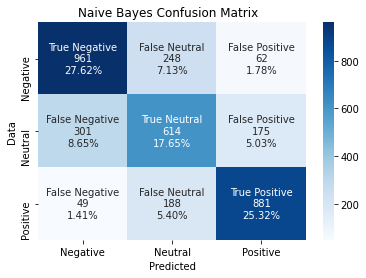

In [ ]:
cm=confusion_matrix(y_test,y_predict)
show_confusion_matrix(cm,'Naive Bayes')

In [ ]:
show_accuracy(NB_classifier)

Accuracy 71 %
Coefficient of determination: 0.43


In [ ]:
pickle.dump(NB_classifier, open('NaiveBayes.pkl','wb'))

## SVM


In [ ]:
from sklearn.svm import SVC
svc = SVC()
svc.fit(X_train, y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [ ]:
y_predict=svc.predict(X_test)

In [ ]:
show_classification_report(y_predict, target_names)

              precision    recall  f1-score   support

    Negative       0.71      0.84      0.77      1271
     Neutral       0.66      0.56      0.61      1090
    Positive       0.84      0.80      0.82      1118

    accuracy                           0.74      3479
   macro avg       0.74      0.73      0.73      3479
weighted avg       0.74      0.74      0.74      3479



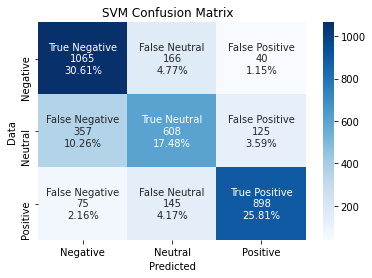

In [ ]:
cm=confusion_matrix(y_test,y_predict)
show_confusion_matrix(cm,'SVM')

In [ ]:
show_accuracy(svc)

Accuracy 74 %
Coefficient of determination: 0.47


In [ ]:
pickle.dump(svc, open('SVM.pkl','wb'))

## Linear SVC

In [ ]:
from sklearn.svm import LinearSVC
linearsvc = LinearSVC()
linearsvc.fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
          intercept_scaling=1, loss='squared_hinge', max_iter=1000,
          multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
          verbose=0)

In [ ]:
y_predict=linearsvc.predict(X_test)

In [ ]:
show_classification_report(y_predict, target_names)

              precision    recall  f1-score   support

    Negative       0.69      0.74      0.72      1271
     Neutral       0.58      0.52      0.55      1090
    Positive       0.78      0.80      0.79      1118

    accuracy                           0.69      3479
   macro avg       0.68      0.69      0.68      3479
weighted avg       0.69      0.69      0.69      3479



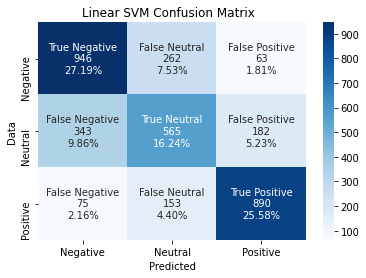

In [ ]:
cm=confusion_matrix(y_test,y_predict)
show_confusion_matrix(cm,'Linear SVM')

In [ ]:
show_accuracy(linearsvc)

Accuracy 69 %
Coefficient of determination: 0.37


In [ ]:
pickle.dump(linearsvc, open('LinearSVM.pkl','wb'))

# TFIDF Vectorizer

In [ ]:
vectorizer=TfidfVectorizer()
X=vectorizer.fit_transform(train_text)

In [ ]:
pickle.dump(vectorizer, open('tfidf_vectorizer_tiki.pkl','wb'))
# vectorizer = pickle.load(open('tfidf_vectorizer_tiki.pkl', 'rb'))

In [ ]:
X_train,X_test,y_train,y_test=train_test_split(X, train_labels, test_size=0.2, random_state=123)

## Naive Bayes

In [ ]:
NB_classifier=MultinomialNB()
NB_classifier.fit(X_train, y_train)
y_predict=NB_classifier.predict(X_test)

In [ ]:
show_classification_report(y_predict, target_names)

              precision    recall  f1-score   support

    Negative       0.69      0.81      0.74      1271
     Neutral       0.61      0.47      0.53      1090
    Positive       0.78      0.80      0.79      1118

    accuracy                           0.70      3479
   macro avg       0.69      0.69      0.69      3479
weighted avg       0.69      0.70      0.69      3479



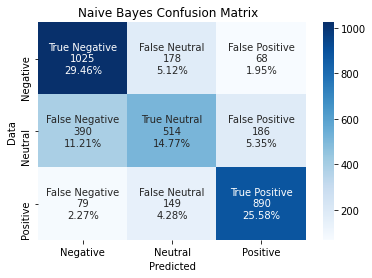

In [ ]:
cm=confusion_matrix(y_test,y_predict)
show_confusion_matrix(cm,'Naive Bayes')

In [ ]:
show_accuracy(NB_classifier)

Accuracy 70 %
Coefficient of determination: 0.37


In [ ]:
pickle.dump(NB_classifier, open('tfidf_NaiveBayes.pkl','wb'))

## SVC

In [ ]:
svc = SVC()
svc.fit(X_train, y_train)
y_predict=svc.predict(X_test)

In [ ]:
show_classification_report(y_predict, target_names)

              precision    recall  f1-score   support

    Negative       0.72      0.83      0.77      1271
     Neutral       0.65      0.56      0.60      1090
    Positive       0.85      0.80      0.82      1118

    accuracy                           0.74      3479
   macro avg       0.74      0.73      0.73      3479
weighted avg       0.74      0.74      0.73      3479



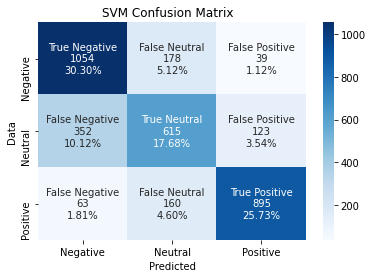

In [ ]:
cm=confusion_matrix(y_test,y_predict)
show_confusion_matrix(cm,'SVM')

In [ ]:
show_accuracy(svc)

Accuracy 74 %
Coefficient of determination: 0.49


In [ ]:
pickle.dump(svc, open('tfidf_SVM.pkl','wb'))

## Linear SVM

In [ ]:
linearsvc = LinearSVC()
linearsvc.fit(X_train, y_train)
y_predict=linearsvc.predict(X_test)

In [ ]:
show_classification_report(y_predict, target_names)

              precision    recall  f1-score   support

    Negative       0.71      0.78      0.75      1271
     Neutral       0.62      0.55      0.58      1090
    Positive       0.82      0.81      0.81      1118

    accuracy                           0.72      3479
   macro avg       0.72      0.71      0.71      3479
weighted avg       0.72      0.72      0.72      3479



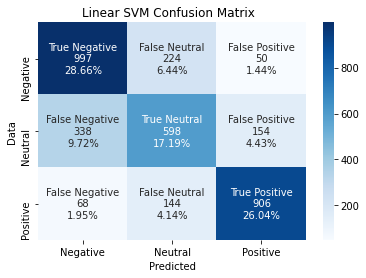

In [ ]:
cm=confusion_matrix(y_test,y_predict)
show_confusion_matrix(cm,'Linear SVM')

In [ ]:
show_accuracy(linearsvc)

Accuracy 72 %
Coefficient of determination: 0.44


In [ ]:
pickle.dump(linearsvc, open('tfidf_LinearSVM.pkl','wb'))

# Test data

In [19]:
df=pd.read_csv("data/data_test2.csv",  encoding='utf8').iloc[:,1:]
print(df.head())
test_text = list(df.loc[:,'sentiment'])
test_labels = list(df.loc[:,'label'])
print(test_text[:10])
print(test_labels[:10])
print(len(test_text),len(test_labels))

   label                                          sentiment
0      0  mình thấy có mấy con thôi mà nó ăn hết cả_gói ...
1      0  chuột vẫn sống_nhăn răng. như chưa hề có chuyệ...
2      0      không thấy chết mà chúng_nó càng làm_loạn hơn
3      0               để mấy ngày chuột không ăn miếng nào
4      0  nhìn thì đẹp mới chơi đã bị gãy mấy thanh rồi ...
['mình thấy có mấy con thôi mà nó ăn hết cả_gói to như_thế vậy_mà không thấy nó chết mới_lạ chứ', 'chuột vẫn sống_nhăn răng. như chưa hề có chuyện gì', 'không thấy chết mà chúng_nó càng làm_loạn hơn', 'để mấy ngày chuột không ăn miếng nào', 'nhìn thì đẹp mới chơi đã bị gãy mấy thanh rồi buồn', 'mới mua về cho bé mình chơi mà các thanh bị gãy đôi, gãy ba.', 'đắt quá mà được ít_nữa không đủ', 'nam_châm không chắc dễ vỡ', 'sản_phẩm bắt muỗi không được. muốn trả lại thôi.', 'rất không hài_lòng với tiki lần này. đây không phải cuốn sách mới, nó đã được lật ra nhiều lần ( vết gấp ở bìa ), cạnh sách thì bụi bẩn phải lấy giẻ để lau']
[0, 0,

In [20]:
def test_data(model, vectorizer, data):
  data = vectorizer.transform(data)
  predicts = model.predict(data)
  return predicts

In [21]:
model = pickle.load(open('SVM.pkl', 'rb'))
vectorizer = pickle.load(open('vectorizer_tiki.pkl', 'rb'))

In [27]:
predicts = test_data(model, vectorizer, test_text)
print(predicts[:5])
print(len(predicts))
Classification_report = classification_report(test_labels,predicts, target_names=target_names)
print(Classification_report)

[0 0 0 0 0]
2814
              precision    recall  f1-score   support

    Negative       0.65      0.85      0.74       950
     Neutral       0.70      0.55      0.62       920
    Positive       0.87      0.78      0.82       944

    accuracy                           0.73      2814
   macro avg       0.74      0.73      0.73      2814
weighted avg       0.74      0.73      0.73      2814

